<a href="https://colab.research.google.com/github/Carocaro0424/Finanzas-Computacionales/blob/main/TALLER_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 3 
Paula Andrea Caro Toloza
Santiago Rodriguez


PUNTO 1 Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022:

­ A. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno. ­

B.Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del CAPM y las betas de los activos.




In [98]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import cvxpy as cp
from scipy.stats import norm
import statsmodels.api as sm

In [99]:
# Opcion 1
## Precio de las acciones 
precios1 = yf.download("MSFT", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
precios2 = yf.download("AAPL", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
precios3 = yf.download("PG", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
precios4 = yf.download("MCO", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
precios5 = yf.download("V", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
## Retornos de las acciones
retornos1 = np.log(precios1/precios1.shift()).dropna()
retornos2 = np.log(precios1/precios1.shift()).dropna()
retornos3 = np.log(precios1/precios1.shift()).dropna()
retornos4 = np.log(precios1/precios1.shift()).dropna()
retornos5 = np.log(precios1/precios1.shift()).dropna()
## Precio y retorno del indice
p_indice = yf.download("^DJI", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
r_indice = np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [100]:
## Tablas anova para cada una de las acciones
# MSFT
X = r_indice
Y = retornos1
X = sm.add_constant(X)
modelMSFT = sm.OLS(Y, X).fit()
print(modelMSFT.summary())




                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        22:18:00   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [101]:
parMSFT= modelMSFT.params
parMSFT

const        0.014197
Adj Close    0.815054
dtype: float64

In [102]:
# AAPL
X = r_indice
Y = retornos2
X = sm.add_constant(X)
modelAAPL = sm.OLS(Y, X).fit()
print(modelAAPL.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        22:18:00   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [103]:
parAAPL= modelAAPL.params
parAAPL

const        0.014197
Adj Close    0.815054
dtype: float64

In [104]:
# PG
X = r_indice
Y = retornos2
X = sm.add_constant(X)
modelPG = sm.OLS(Y, X).fit()
print(modelPG.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        22:18:00   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [105]:
parPG= modelPG.params
parPG

const        0.014197
Adj Close    0.815054
dtype: float64

In [106]:
# MCD
X = r_indice
Y = retornos2
X = sm.add_constant(X)
modelMCD = sm.OLS(Y, X).fit()
print(modelMCD.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        22:18:00   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [107]:
parMCD= modelPG.params
parMCD

const        0.014197
Adj Close    0.815054
dtype: float64

In [108]:
# V
X = r_indice
Y = retornos2
X = sm.add_constant(X)
modelV = sm.OLS(Y, X).fit()
print(modelV.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        22:18:00   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [109]:
parV= modelV.params
parV

const        0.014197
Adj Close    0.815054
dtype: float64

In [110]:
mediaindice= r_indice.mean()
mediaindice

0.004889644163221778

In [111]:
#Retornos estimados
ret_MSFT =parMSFT[1]*mediaindice
ret_AAPL =parAAPL[1]*mediaindice
ret_PG =parPG[1]*mediaindice
ret_MCD =parMCD[1]*mediaindice
ret_V =parV[1]*mediaindice

In [112]:
#betas 
beta_MSFT =parMSFT[1]
beta_AAPL =parAAPL[1]
beta_PG =parPG[1]
beta_MCD =parMCD[1]
beta_V =parV[1]

In [113]:
# r_squeared
r_sq_MSFT= modelMSFT.rsquared
r_sq_AAPL= modelAAPL.rsquared
r_sq_PG = modelPG.rsquared
r_sq_MCD= modelMCD.rsquared
r_sq_V= modelV.rsquared

In [114]:
#retornos esperados
retp_MSFT =retornos1.mean()
retp_AAPL =retornos2.mean()
retp_PG =retornos3.mean()
retp_MCD =retornos4.mean()
retp_V =retornos5.mean()

In [115]:
#Volatilidades
vol_MSFT= retornos1.std()
vol_AAPL= retornos2.std()
vol_PG= retornos3.std()
vol_MCD= retornos4.std()
vol_V= retornos5.std()

In [116]:
# Tabla resuumen punto 1 inciso B 
tabla_resumen= {"retorno estimado": [ret_MSFT, ret_AAPL, ret_PG, ret_MCD, ret_V],
                "sigma": [beta_MSFT, beta_AAPL, beta_PG, beta_MCD, beta_V],
                "retorno esperado": [retp_MSFT, retp_AAPL, retp_PG, retp_MCD, retp_V],
                "r_squared": [r_sq_MSFT, r_sq_AAPL, r_sq_PG, r_sq_MCD, r_sq_V],
                "Volatilidades": [vol_MSFT, vol_AAPL, vol_PG, vol_MCD, vol_V]}
tabla= pd.DataFrame(tabla_resumen, index= ["MSFT", "AAPL", "PG", "MCD", "V"])
tabla

,retorno estimado,sigma,retorno esperado,r_squared,Volatilidades
MSFT,0.003985,0.815054,0.018183,0.505486,0.061457
AAPL,0.003985,0.815054,0.018183,0.505486,0.061457
PG,0.003985,0.815054,0.018183,0.505486,0.061457
MCD,0.003985,0.815054,0.018183,0.505486,0.061457
V,0.003985,0.815054,0.018183,0.505486,0.061457


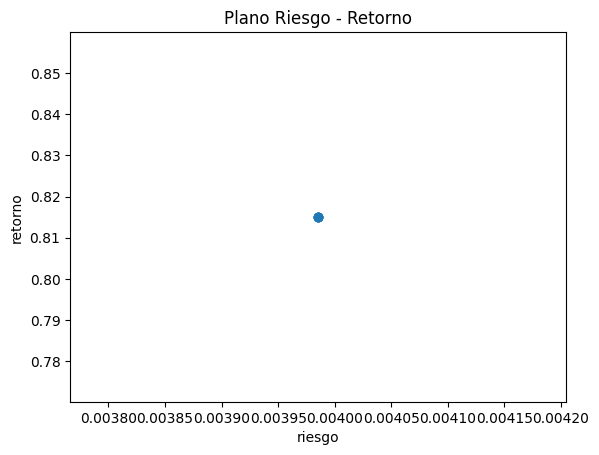

In [117]:
ret_estimado=pd.DataFrame([ret_MSFT, ret_AAPL, ret_PG, ret_MCD, ret_V])
sigma= pd.DataFrame([beta_MSFT, beta_AAPL, beta_PG, beta_MCD, beta_V])
fi, ax= plt.subplots();
ax.scatter(ret_estimado, sigma)
ax.set_xlabel("riesgo")
ax.set_ylabel("retorno")
ax.set_title("Plano Riesgo - Retorno")
plt.show()

Opcion 2 alternativa 

In [118]:
acciones = ['MSFT', 'AAPL', 'PG', 'MCD', 'V']


# Descargar el historico de precios para estos estocks en un periodo de 5 años con una frecuencia de un mes
prices = yf.download(acciones, start='2017-12-01', end='2022-12-31', interval='1mo')['Adj Close']

# Calcular el retorno mensual de cada uno de los stocks
returns = prices.pct_change().dropna()

# Definir el indice de Dow Jones
indice = yf.download('^DJI', start='2017-12-01', end='2022-12-31', interval='1mo')['Adj Close'].pct_change().dropna()

# Por cada accion, calculamos: Retornos esperados (Promedio), Volatilidad, el beta, el CAPM y el coeficiente de determinacion
results = []
for accion in acciones:
    X = sm.add_constant(indice)
    y = returns[accion]
    model = sm.OLS(y, X).fit()
    beta = model.params[1]
    promedio = np.mean(y)
    volatilidad = np.std(y)
    retorno_esperado = promedio - beta * np.mean(indice)
    coef_determinacion = model.rsquared
    results.append({'Accion': accion, 'Retornos esperados': promedio, 'Volatilidad': volatilidad, 'Beta': beta, 'CAPM': retorno_esperado, 'Coeficiente de determinacion': coef_determinacion})

# Create a DataFrame with the results
df_results = pd.DataFrame(results).set_index('Accion')
df_results

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


,Retornos esperados,Volatilidad,Beta,CAPM,Coeficiente de determinacion
Accion,,,,,
MSFT,0.020236,0.061950,0.818012,0.015070,0.492471
AAPL,0.023963,0.092579,1.093157,0.017059,0.393805
PG,0.011917,0.050208,0.458515,0.009021,0.235559
MCD,0.010629,0.055435,0.718608,0.006091,0.474622
V,0.012895,0.068066,1.007641,0.006531,0.618995


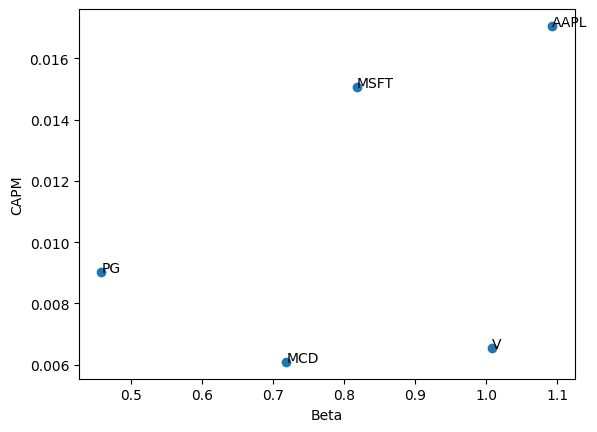

In [119]:
import matplotlib.pyplot as plt

# Diagramar el plano de riesgo-retrno
plt.scatter(df_results['Beta'], df_results['CAPM'])
plt.xlabel('Beta')
plt.ylabel('CAPM')
for accion in acciones:
    plt.annotate(accion, (df_results.loc[accion, 'Beta'], df_results.loc[accion, 'CAPM']))
plt.show()

PUNTO 2

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


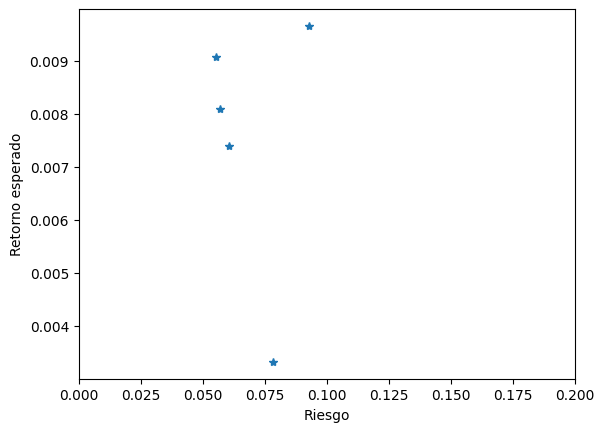

In [120]:
activos=["BRK-B","CVX","IBM","KO","MCD"] 
precios = yf.download(activos, start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos = np.log(precios/precios.shift()).dropna()
p_indice = yf.download("^DJI", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
r_indice = np.log(p_indice/p_indice.shift()).dropna()
#Retornos esperados
mu = retornos.mean()
# Matriz de covarianzas
cov = retornos.cov()
#Desviacion 
sigma = retornos.std()
plt.plot(sigma, mu, '*')
plt.ylabel("Retorno esperado")
plt.xlabel("Riesgo")
plt.xlim(0,0.2)
plt.show();

In [121]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()

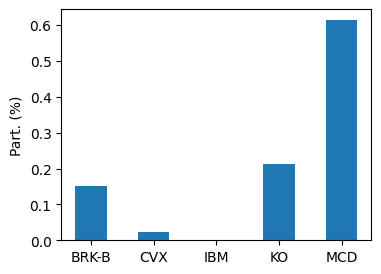

In [122]:
plt.figure(figsize = (4, 3))
plt.bar(activos, x.value/x.value.sum(), width = 0.5)
plt.ylabel("Part. (%)")
plt.show();

In [123]:
# Retornos históricos del portafolio tangente:
ret_port = retornos @ wpt
rpt = ret_port.mean()
sigmapt = ret_port.std()
rpt, sigmapt

(0.008623206549268977, 0.05028162484554733)

In [124]:
df = pd.DataFrame({' ' : ["BRK-B","CVX","IBM","KO","MCD"],
        'Retorno esperado' : [mu[0],mu[1],mu[2],mu[3],mu[4]],
        'Volatilidad' : [sigma[0],sigma[1],sigma[2],sigma[3],sigma[4]],
        'weights (%)' : [wpt[0], wpt[1], wpt[2],wpt[3],wpt[4]]})
df

,,Retorno esperado,Volatilidad,weights (%)
0,BRK-B,0.007394,0.060573,1.518199e-01
1,CVX,0.009659,0.092632,2.287106e-02
2,IBM,0.003324,0.078160,-4.911372e-21
3,KO,0.008096,0.057042,2.120538e-01
4,MCD,0.009071,0.055288,6.132552e-01


95% VaR

In [125]:
w = cp.Variable(n)
riesgo = cp.quad_form(w,cov)
objective = cp.Minimize(riesgo)
constraints = [cp.sum(w)==1, w>=0]
optimizar = cp.Problem(objective,constraints)
optimizar.solve()
wpmvg = w.value
r_ptf = retornos @ wpmvg 

In [126]:
#Retorno del portafolio y volatilidad
Ret_port=r_ptf.mean()
vol_port=r_ptf.std()
print(Ret_port,vol_port) 

0.007943813951662958 0.04903159706398849


In [127]:
#Delta VAR 1
alpha=0.01 
Var_por=Ret_port- norm.ppf(1-alpha)*vol_port
Var_por

-0.10612073763897381

In [128]:
#Delta VAR 2
alpha=0.05 #95% de confianza y 5% de significancia
Var_por_2=Ret_port- norm.ppf(1-alpha)*vol_port
Var_por_2

-0.07270598631426167

In [129]:
VAR_E=np.percentile(Ret_port,1) #99% de confianza y 1% de significancia
VAR_E

0.007943813951662958

In [130]:
#C. Calcular el VaR nivel de confianza al 95%

In [131]:
w = cp.Variable(n)
riesgo = cp.quad_form(w,cov)
objetivo = cp.Minimize(riesgo)
constraints = [cp.sum(w)==1, w>=0]
optimizar = cp.Problem(objetivo,constraints)
optimizar.solve()
wpmvg = w.value
r_ptf1 = retornos @ wpmvg

In [132]:
#Retorno del portafolio y volatilidad
Ret_port1=r_ptf1.mean()
vol_port1=r_ptf1.std()

In [133]:
# Delta VaR
alpha = 0.01
Varp1 = Ret_port1 - norm.ppf(1-alpha)*vol_port1
Varp1

-0.10612073763897381

In [134]:
alpha1 = 0.05
VaRp1 = Ret_port1 - norm.ppf(1-alpha1)*vol_port1
VaRp1

-0.07270598631426167

In [135]:
Var_historico = np.percentile(r_ptf1,1) # 1 para el 99% de confianza
Var_historico

-0.11714067651703

D Monte carlo

In [136]:
port_rand = 1000
weights = np.zeros((port_rand, n))
for i in range(port_rand):
    w = np.random.random(n) 
    w = w / np.sum(w)            
    weights[i,:] = w    

In [137]:
rand_rpt = weights @ mu
rand_sigmapt = np.zeros(port_rand)
for i in range(port_rand):
  rand_sigmapt[i] = np.sqrt(weights[i,:].T @ cov @ weights[i,:])

In [138]:
Ret_mc=rand_rpt.mean()
Des_mc=rand_rpt.std()

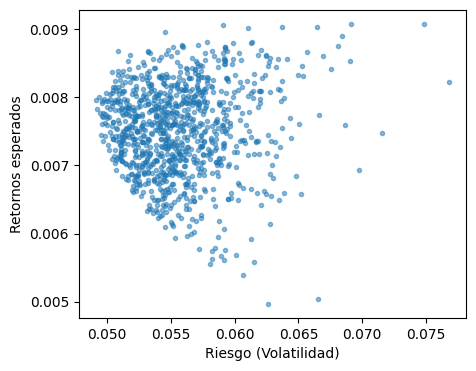

In [139]:
plt.figure(figsize=(5,4))
plt.plot(rand_sigmapt, rand_rpt, '.', alpha=0.5)
plt.xlabel("Riesgo (Volatilidad)")
plt.ylabel("Retornos esperados")
plt.show();

In [140]:
# Delta VaR
alpha = 0.01
VarMC1 = Ret_mc - norm.ppf(1-alpha)*Des_mc
VarMC1

0.005977866076463287

In [141]:
#E 
Var_mc = np.percentile(Ret_mc,1) # 1 para el 99% de confianza
Var_mc

0.007523141144502278

In [142]:
#Var parametrico
VAR_E=np.percentile(Ret_port,1) #99% de confianza y 1% de significancia
VAR_E

0.007943813951662958

PUNTO 3

In [143]:
from pandas_datareader import data as wb
from datetime import datetime
activos = ("AMZN")
precios3 = yf.download(activos, start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] # Periodo de 5 años con base mensual
retornos3 = np.log(precios3/precios3.shift()).dropna()
precios3

[*********************100%***********************]  1 of 1 completed


Date
2017-12-01     58.473499
2018-01-01     72.544502
2018-02-01     75.622498
2018-03-01     72.366997
2018-04-01     78.306503
                 ...    
2022-08-01    126.769997
2022-09-01    113.000000
2022-10-01    102.440002
2022-11-01     96.540001
2022-12-01     84.000000
Name: Adj Close, Length: 61, dtype: float64

In [156]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu3 - 0.5 * sigma3 ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [157]:
T = 1
mu3 = retornos3.mean()
sigma3 = retornos3.std()*np.sqrt(12)
SO = precios3[-1]
NS = 20
M = 12
St = PathsGBM(SO,mu3,sigma3,T,NS,M)


Text(0.5, 0, 'Tiempo')

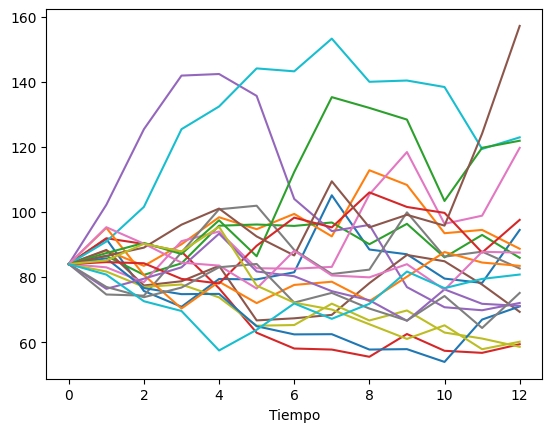

In [147]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

In [158]:
St[:,-1].mean()

74.93018096988801

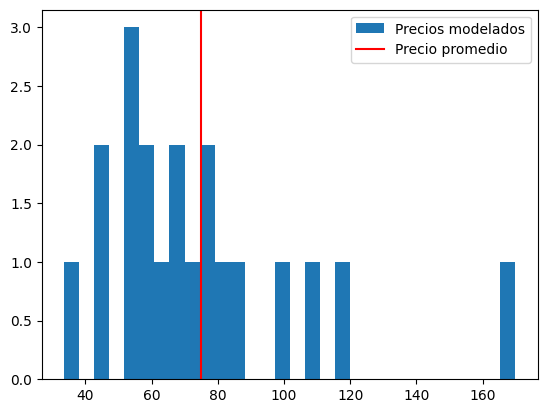

In [159]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

PUNTO 4

In [160]:
#Datos
X0 = 1   
mu4 = 3   
sigma4 = 0.3   
T = 5   
ns = 100  
m = 100   
dt = T / m

In [161]:
#Parametrizamos la función
def OrnsteinUhlenbeck(X0, mu, sigma, T, dt):
    N = round(T/dt) 
    t = np.linspace(0, T, N+1) 
    X = np.zeros(N+1) 
    X[0] = X0 
    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt)) 
        X[i+1] = X[i] + (mu-X[i])*dt + sigma*dW 
    return  t, X

In [164]:
trayectorias = []
for i in range(ns):
    _, X = OrnsteinUhlenbeck(X0, mu4, sigma4, T, dt)
    trayectorias.append(X)

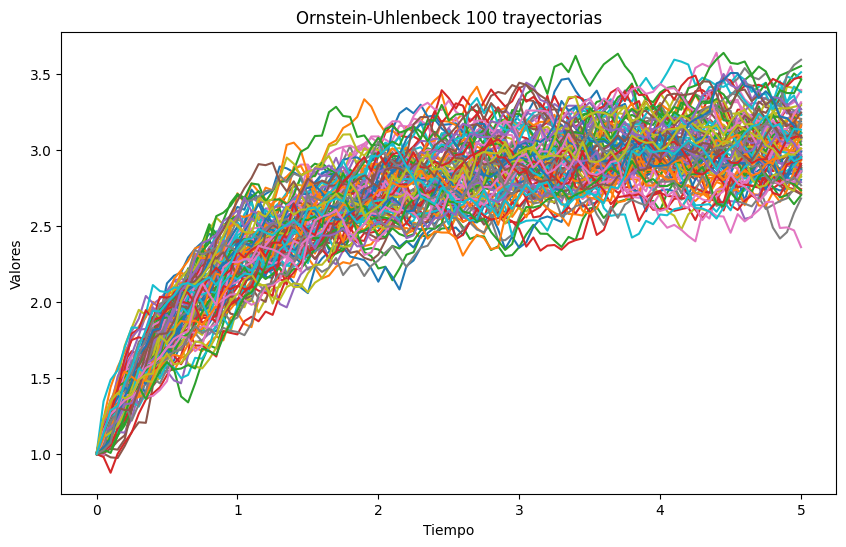

In [165]:
plt.figure(figsize=(10,6))
for i in range(ns):
    plt.plot(np.linspace(0, T, m+1), trayectorias[i])
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Ornstein-Uhlenbeck 100 trayectorias')
plt.show()

PUNTO 5

In [166]:
activos5 = ("BZ=F")
precios5 = yf.download(activos5, start="2004-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos5 = np.log(precios5/precios5.shift()).dropna()
SO = precios5[-1]
SO


[*********************100%***********************]  1 of 1 completed


85.91000366210938

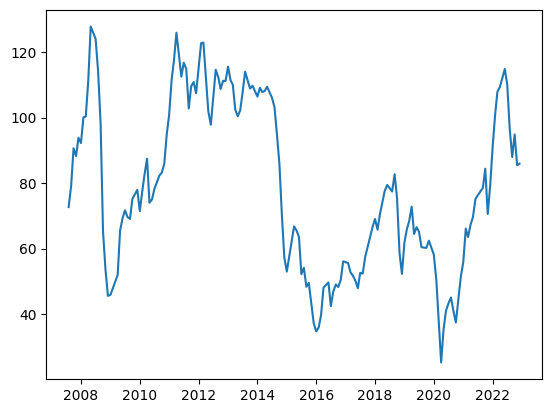

In [167]:
# Grafica sobre los precios
plt.plot(precios5)

In [168]:
# B Prueba de estacionareidad
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [169]:
pruebadf1 = adfuller(precios5)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.497247
P-value: 0.116146
Citical values:
	1%: -3.472703
	5%: -2.880132
	10%: -2.576683


In [180]:
def PathsGBM(S0,mu5,sigma5,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    SO =S[:,0] 
    dt = T / M # T = Unidades año, M = Número de trayectorias
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu5 - 0.5 * sigma5 ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [185]:
SO = precios5[-1]
SO

85.91000366210938

In [187]:
# C
T = 1 
mu5 = retornos5.mean()*12
sigma5 = retornos5.std()*np.sqrt(12)
SO = precios5[1]
NS = 100 
M = 1
St = PathsGBM(S0,mu,sigma,T,NS,M)

NameError: ignored

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

In [ ]:
St[:,-1].mean()